# **GEOG 60.01** ***Problem Set #1***

### Instructions

- **Save a copy of this PS to your jhub directory**, naming the file as follows:
`lastname_firstname_pset1_geog60.ipynb`

- **Complete the problems below by typing answers in additional cells you have created**. Save often.

- Some assignments have **optional bonus problems**. These are meant to be interesting and thought-provoking, but are not required. Extra credit will be given for interesting answers to the bonus problems.

- Remember to set your cell types to `Markdown` for text, and `Code` for Python code!

- **Include comments** in any code to explain your method as necessary. We want to give you points, not take them away.

- Remember to actually answer the questions. **Typed responses to questions in cells you create are required** (not just code and figures!)

- You can work on the problem set in groups, with two caveats: (1) **everyone must turn in their own copy in their own words**; (2) **you must list the names of your collaborators in a cell at the end of the problem set**

- Your solutions should all be in this **single Jupyter notebook** that contains your text, your code, and your figures.

- **To submit this PS once you're done, do the following:**
    1. *Make sure that your notebook* ***runs cleanly without errors:***
        - Save your notebook
        - From the `Kernel` menu, select `Restart & Run All`
        - Did the notebook run from start to finish without error and produce the expected output?
        - If yes, save again and proceed to the next step
        - If no, fix the errors and try again
    2. Download your saved PS to your computer with all your answers and figures, `code` and `Markdown` rendered. 
    3. Turn in your PS by uploading it to Canvas under the PS#1 assigment.

### Learning goals
This problem set is intended to apply and extend concepts from class, whether around modeling practices and pitfalls generally, or Earth System Modeling specifically.

Students completing this assignment will gain the following skills and concepts:

- More familiarity with the Jupyter notebook
- More familiarity with formalizing models
- More familiarity with our zero-dimensional Energy Balance Model
- An understanding of model practices like sensitivity analysis and calibration
- More familiarity with dynamic systems and the factors determining their time dependence
- Introduction to the concept of albedo feedback
- Use of numerical timestepping to find the equilibrium temperature
- Programming skills: arrays, loops, and simple graphs

---
# Problem 1. Sensitivity Analysis with our EBM
---

After calibrating parameter values, modelers often pursue a ["sensitivity analysis", (SA)](http://www.andreasaltelli.eu/file/repository/Risk_Analysis_2002.PDF), an activity where we assess the uncertainty in our model to (usually) parametric assumptions. [Perturbed physics ensembles](https://archive.ipcc.ch/publications_and_data/ar4/wg1/en/ch10s10-5-4-2.html) with Earth System Models (ESMs) are a common form of SA in climate science. 

Let's do a rudimentary SA with our EBM from class. 

At present, the emission temperature, $T_e$, of the Earth at TOA is 255K; Earth's albedo is ~30%.

How would emission temperature, $T_e$ change if:
    # a. The albedo was reduced to 10% (and all else were held fixed)?
    # b. the infrared absorptivity of the atmosphere (epsilon) was doubled, but albedo remained fixed at 30%

In [ ]:
# a. albedo down to 0.1, what happens to equilibrium temperature?

In [ ]:
# WE GIVE THEM: 

# (empty cell)

In [1]:
## EXAMPLE/POSSIBLE ANSWER ##

# changing alpha
alpha = 0.1

Q = 341.3           # W m-2
sigma = 5.67e-8     # S-B Constant

# Compute eq. temp. out = in
T_e = (((1-alpha) * Q) / sigma)**(1/4)

# print
print('Old temperature: {:.2f} K'.format(255))
print('New Emission temperature: {:.2f} K'.format(T_e))
print('∆ Emission temperature: {:.2f} K'.format(T_e-255))

Old temperature: 255.00 K
New Emission temperature: 271.30 K
∆ Emission temperature: 16.30 K


In [ ]:
# b. epsilon doubled, albedo the same

In [ ]:
## EXAMPLE/POSSIBLE ANSWER ##

# EMISSON temperature is effectively the sigma*T**4 that OUTER SPACE sees. 
# Changing epsilon would change Earth's SUFACE temperature / energy balance at the surface,
# but will not change the equilibrium amt. of energy outer space sees since there is no 
# ∆ in energy_in. 

# (not the best writing but hopefully that makes sense...)

---
# Problem 2. Model Formalization & the Flat Earther's EBM
---

[Flat Earther's](https://www.newyorker.com/science/elements/looking-for-life-on-a-flat-earth) are tragic modelers, violating [George Box's](https://en.wikipedia.org/wiki/George_E._P._Box) cardinal rule, that one ["must not be like Pygmalion, and fall in love with [one’s] model”](https://www-tandfonline-com.dartmouth.idm.oclc.org/doi/abs/10.1080/01621459.1976.10480949).

Certainly, a flat Earth EBM would be all wrong given what we observe. To prove them wrong with science, let's get some more practice one of the more challenging steps in the modeling process, that from conceptualization to formalization--from a diagramatic to mathematical model.

Let's consider Earth, for the sake of argument, to be a thin circular disk (of radius 6370 km), orbiting the Sun at the same distance as the Earth; the planetary albedo is 30%. 

The face of this disk always points directly towards the Sun, and the disk is made of perfectly conducting material, so both faces of the disk are the same tempreature. 

Caluclate the emission (TOA) temperature, $T_e$, of this disk, and compare with our EBM emission temperature, $T_e$, for a spherical Earth.

What does simple physics of the TOA emission temperature tell us about the Flat Earther theory? (Write an answer.)

In [ ]:
## EXAMPLE/POSSIBLE ANSWER ##

First, look at how the earth will absorb energy as a sphere earth and as a flat earth. 

- Sphere Earth absorbs sunlight as a disk, so:

    - $ \text{ENERGY IN (SPHERE)} = (1 - \alpha) L \pi r^2 $ (S.A. of disk = $\pi r^2)$

- Flat Earth ALSO absorbs sunlight as a disk, so:

    - $ \text{ENERGY IN  (FLAT)} = (1 - \alpha) L \pi r^2 $ (S.A. of disk = $\pi r^2)$

Next, look at how the earth will EMIT energy as a sphere earth and as a flat earth. 

- Sphere Earth emits radiation as a sphere, so:

    - $ \text{ENERGY OUT (SPHERE)} = \sigma T^4 4 \pi r^2 $ (S.A. of sphere = 4$\pi r^2)$

- Flat Earth emits radiation as a 2-SIDED disk, so:

    - $ \text{ENERGY OUT (SPHERE)} = \sigma T^4 2 \pi r^2 $  (S.A. of disk = $\pi r^2$, multiply x2)

Rearrange to solve for T_eq for both:

$$ T_{eq_{sphere}} = \left( \frac{(1-\alpha)Q}{4 \sigma} \right)^{\frac{1}{4}} $$ 

$$ T_{eq_{disk}} = \left( \frac{(1-\alpha)Q}{2 \sigma} \right)^{\frac{1}{4}} $$ 

So...

$$ T_{eq_{disk}} = 2 T_{eq_{sphere}} $$

---
# Problem 3. Ocean's Heat Capacity and the Time Dependence of Dynamic Systems
---

Dynamic systems are, by definition, systems that we assess as a function of time. 

The time it takes for a system to reach equilibrium or respond to a perturbation matters (e.g., consider the ["velocity" of climate change](https://www.nature.com/articles/nature08649). 

Returning to our dynamic EBM, we now suppose that:

$$ E = C T_s $$

where $E$ is the total in **[enthalpy](https://en.wikipedia.org/wiki/Enthalpy)** or **heat content** of the Earth; $T_s$ is the **global mean surface (not emission) temperature**, and $C$ is a parameter representing the **effective heat capacity** of the atmosphere-ocean column; it represents the size of our reservoir for heat, and it helps convert units of energy into units of temperature.
then our budget equation becomes:


$$ C \frac{dT_s}{dt} = \text{ASR} - \text{OLR} $$

where

- $C$ is the **heat capacity** of Earth system, in units of J m$^{-2}$ K$^{-1}$.
- $\frac{dT_s}{dt}$ is the rate of change of global average surface temperature.

By adopting this equation, we are assuming that the energy content of the Earth system (atmosphere, ocean, ice, etc.) is *proportional to surface temperature*.

The ocean is incredibly important here. The [specific heat of water](https://en.wikipedia.org/wiki/Specific_heat_capacity) is very large, meaning it takes a tremendous amount of energy to change water's temperature by one degree. This feature of water, and the fact that ~70% of the Earth is water means that the oceans buffer (i.e., absorb) much of the excess energy from global warming. 

To start, we are going to use a value of C equivalent to heating 100 meters of water:

$$C = c_w \rho_w H$$

where 

$c_w = 4 \times 10^3$ J kg$^{-1}$ $^\circ$K$^{-1}$ is the specific heat of water, 

$\rho_w = 10^3$ kg m$^{-3}$ is the density of water, and

$H$ is an effective depth of water that is heated or cooled - **this is the lever we're going to pull on**

In [2]:
c_w = 4E3  #  Specific heat of water in J/kg/K
rho_w = 1E3  #  Density of water in kg/m3

In Friday's practical, we defined a time dependent EBM for the global mean surface temperature $T_s$ as follows

$$ C  \frac{dT_s}{dt} = \text{ASR} - \text{OLR}$$

Refer back to our class practicals for the implementation of our time dependent EBM and the relevant parameter values.

1. If the heat penetrated to twice as deep into the ocean, the value of $C$ would be twice as large. Would this affect the **equilibrium temperature**, $T_eq$? Why or why not?
2. Define a simple function to caculated $C$, based on its equation above.
3. Use this function to perform a simple sensitivity analysis to calculate how long it takes for our time-dependent EBM to reach its equilibrium temperature, $T_eq$, for two ocean depths:
    - 100 m
    - 500 m
        - NOTE: You can read these equilibrium times off of an array, a plot, or define a function to make this calculation of time to equilibrium.
4. Reflect on these results -- what do your results show about the role of heat capacity on climate change and or its timescales? **Give a short written answer.**

In [5]:
# import numpy
import numpy as np
import matplotlib.pyplot as plt

In [10]:


# function to compute C given H (maybe I should get rid of the huge description and make it super concise)
def compute_C(H):
    '''
    This function computes Ocean Heat Capacity based on the equation
    C = c_w * rho_w * H
    
    C = heat capacity
    c_w = specific heat of water (CONSTANT)
    rho_w = density of water (CONSTANT)
    H = effective depth of water that is heated
    
    Args: 
        H
        
    Returns: 
        C
    '''
    
    # Set CONSTANTS:
    c_w = 4e3     # J kg-1 ˚C-2
    rho_w = 1e3  # kg m-3
    
    C = c_w * rho_w * H
    
    return C

In [39]:
# functions to compute ASR and OLR

def ASR(Q=Q, alpha=0.32):  # Setting the default to the NEW alpha value here
    return (1-alpha) * Q

def OLR(T, epsilon=0.57, sigma=5.67e-8): # Setting the defaults to the NEW epsilon value here
    return epsilon * sigma * T**4

# function to 'step forward' in time
def step_forward(T, C): 
    return T + dt / C * (ASR(Q) - OLR(T) )
# This is just giving us a T2 for an arbitrary initial temperature, T

In [68]:
# function that packages:
    # compute_C
    # ASR
    # OLR
    # step_forward
    # for-looping
    # and plotting
    
def yrs_to_eq(H, alpha=0.32, epsilon=0.57, initial_T=288):
    '''
    Params:
        h = how deep heat penetrates into ocean
        alpha = albedo
        epsilon = emissivity
        initial_T = earth's initial surface temperature (default = 288K)
        
    Returns:
        temps = np.array of surface temp for each year. 
    '''

    # define timestep - 1 year
    dt = 60. * 60. * 24. * 365.   # one year expressed in seconds

    # compute C for this value of H
    C = compute_C(H)
    print('The effective heat capacity is {:.1e} J/m2/K'.format(C))

    numsteps = 250 # here are the number of timesteps (sim for 250 years)
    temps = np.zeros(numsteps+1) # Empty vector to track temperatures (+1 is because we want to store the initial temperature)
    years = np.zeros(numsteps+1) # Empty vector to track timesteps (years)
    temps[0] = initial_T # editing the first element of the temp vector to be the initial temperature (288K)

    # for each time step "n"
    for t in range(numsteps): 

        # add the next value to the time step tracker (where in time is our algorithm?)
        years[t+1] = t+1 
        # use current Temp at time t, heat capacity, timestep, and the "step_forward" function to predict T at t+1
        temps[t+1] = step_forward(temps[t], C)

    # plot:
    fig, ax = plt.subplots()

    # plot temp data (x data = years, y data = temps)
    ax.plot(years, temps)

    ax.set(xlabel='Years', ylabel='Temp [K]', title='Time to equilibrium when heat penetrates {} m'.format(H))
    
    return temps

The effective heat capacity is 4.0e+08 J/m2/K
32 years til equilibrium with H= 100 m


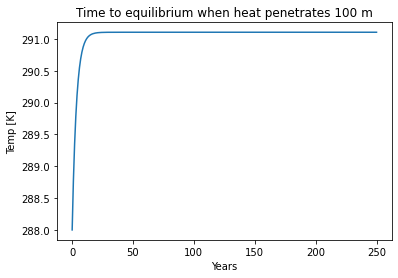

In [76]:
## EXAMPLE/POSSIBLE ANSWER ##

# a). h = 100 vs. h = 500

# call fn with h=100
h=100
temps_h100 = yrs_to_eq(h)
# temps_h100

# compute number of years to reach equilibrium taking first difference...
# np.diff(temps) < 0.0001 # first diff of temp below some acceptable threshold so we say ok, it'll be at equlibrium

# THis is the number of years elapsed until diff(temps) < 0.0001
# effectively 'years til equilibrium?'
yrs_til_eq_h100 = np.argwhere(np.diff(temps_h100)<0.0001)[0].item()
print('{} years til equilibrium with H= {} m'.format(yrs_til_eq_h100, h))

The effective heat capacity is 2.0e+09 J/m2/K
143 years til equilibrium with H= 500 m


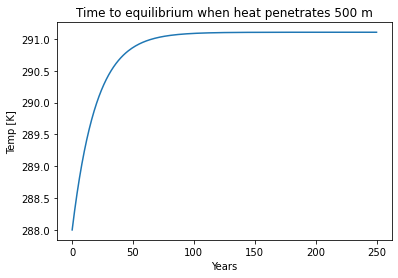

In [78]:
# call fn with h=500
h=500
temps_h500 = yrs_to_eq(h)
# temps_h500

# compute number of years to reach equilibrium taking first difference...
# np.diff(temps) < 0.0001 # first diff of temp below some acceptable threshold so we say ok, it'll be at equlibrium

# THis is the number of years elapsed until diff(temps) < 0.0001
# effectively 'years til equilibrium?'
yrs_til_eq_h500 = np.argwhere(np.diff(temps_h500)<0.0001)[0].item()
print('{} years til equilibrium with H= {} m'.format(yrs_til_eq_h500, h))

---
# Problem 4. Model Complexity: Definining an Albedo Feedback to our EBM
---

Recall from our bathtub that $FO$ was a function of $WL$, just like $\text{OLR}$ is a function of $T$ (i.e, $\sigma T^4$). 

Now we're going to make our model a bit more complex, introducing a new physical process into our model by **letting the planetary albedo depend on temperature**. 

The idea is that a warmer planet has less ice and snow at the surface, but perhaps a larger distribution of clouds, and so there are countervailing responses of planetary albedo. But in general, we think a warmer planet has a lower albedo.

Represent the ice-albedo feedback through the following formula (hint, use [`if` and `elif` statements](https://docs.python.org/3/tutorial/controlflow.html)):

$$ \alpha(T) = \left\{ \begin{array}{ccc}
\alpha_i &   & T \le T_i \\
\alpha_o + (\alpha_i-\alpha_o) \frac{(T-T_o)^2}{(T_i-T_o)^2} &   & T_i < T < T_o \\
\alpha_o &   & T \ge T_o \end{array} \right\}$$

with the following parameter values:

- $\alpha_o = 0.289$ is the albedo of a warm, ice-free planet
- $\alpha_i = 0.7$ is the albedo of a very cold, completely ice-covered planet
- $T_o = 293$ K is the threshold temperature above which our model assumes the planet is ice-free
- $T_i = 260$ K is the threshold temperature below which our model assumes the planet is completely ice covered. 

For intermediate temperatures, this formula gives a smooth variation in albedo with global mean temperature. It is tuned to reproduce the observed albedo $\alpha = 0.299$ for $T = 288$ K.

- Define a Python function that implements the above albedo formula. *There is definitely more than one way to do it. It doesn't matter how you do it as long as it works!*
-  Use your function to calculate albedos for a wide range on planetary temperature (e.g. from $T=250$ K to $T=300$ K.)
- Present your results (albedo as a function of global mean temperature, or $\alpha(T)$) in a nicely labeled graph, like one from the practicals.
- Reflect on what your results tell you about tipping points

In [ ]:
## EXAMPLE/POSSIBLE ANSWER ## (see all belos)

In [1]:
# if-satement version of albedo fn 

def ice_albedo(T):
    '''
    Represents Ice-Albedo Feedback Formula. 
    
    Args: T = Planetary Temperature (float or int)
    
    Returns: a_T = Albedo at temp T (float)
    '''
    
    # define parameter values
    a0 = 0.289
    ai = 0.7
    T0 = 293
    Ti = 260
    
    # the function
    if T <= Ti:
        a_T = ai
    elif Ti < T < T0:
        a_T = a0 + (ai - a0) * (((T-T0)**2)/((Ti-T0)**2))
    elif T >= T0:
        a_T = a0
        
    # return
    return a_T

In [28]:
# NUMPY VERSION 
def ice_albedo_2(T):
    '''
    Arg's: T = Planetary temperature (np.array)
    
    Returns: a_T = Planetary albedo (np.array)
    '''
    
    # define parameter values
    ao = 0.289
    ai = 0.7
    To = 293
    Ti = 260
    
    # implement piecewise function over np array
    alb1 = ao + (ai-ao)*((T-To)**2 / (Ti - To)**2)
    alb2 = np.where(T>Ti, alb1, ai)
    alb3 = np.where(T<To, alb2, ao)
    
    return alb3

In [5]:
# make array of planetary temps:
temp_in_arr = np.linspace(250, 300, 100) # array from 250-300, 100 steps. stepping in intervals of 0.5
# temp_in_arr

# empty array for albedos
albedo_arr = np.zeros(shape=temp_in_arr.shape)

In [6]:
# pass that to the albedo function
for cntr, T in enumerate(temp_in_arr):

    albedo_arr[cntr] = ice_albedo(T)

In [ ]:
# 1. 3. Present your results (albedo as a function of global mean temperature, or $\alpha(T)$) in a nicely labeled graph.

In [8]:
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Representation of albedo feedback function'),
 Text(0, 0.5, 'Planetary albedo [frac]'),
 Text(0.5, 0, 'Planetary Temp [K]')]

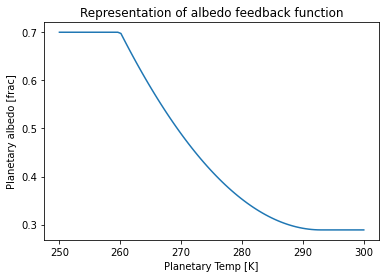

In [11]:
fig, ax = plt.subplots()

ax.plot(temp_in_arr, albedo_arr)
ax.set(title='Representation of albedo feedback function',
       ylabel='Planetary albedo [frac]',
       xlabel='Planetary Temp [K]')

---

---

In [17]:
# function that packages:
    # compute_C
    # ASR
    # OLR
    # step_forward
    # for-looping
    # and plotting
    
def time_to_eq(H, alpha, epsilon, initial_T=288):
    '''
    Params:
        h = how deep heat penetrates into ocean
        alpha = albedo
        epsilon = emissivity
        initial_T = earth's initial surface temperature (default = 288K)
        
    Returns:
        temps = np.array of surface temp for each year. 
    '''

    # define timestep - 1 year
    dt = 60. * 60. * 24. * 365.   # one year expressed in seconds
    
    # compute C for this value of H
    C = compute_C(H)
    print('The effective heat capacity is {:.1e} J/m2/K'.format(C))
    
    numsteps = 500 # here are the number of timesteps (sim for 500 years)
    temps = np.zeros(numsteps+1) # Empty vector to track temperatures (+1 is because we want to store the initial temperature)
    years = np.zeros(numsteps+1) # Empty vector to track timesteps (years)
    temps[0] = initial_T # editing the first element of the temp vector to be the initial temperature (288K)

    # for each time step "n"
    for t in range(numsteps): 

        # add the next value to the time step tracker (where in time is our algorithm?)
        years[t+1] = t+1 
        # use current Temp at time t, heat capacity, timestep, and the "step_forward" function to predict T at t+1
        temps[t+1] = step_forward(temps[t], C, dt, alpha, epsilon)

    # plot:
    fig, ax = plt.subplots()

    # plot temp data (x data = years, y data = temps)
    ax.plot(years, temps)

    ax.set(xlabel='Years', ylabel='Temp [K]', title='Time to equilibrium when heat penetrates {} m'.format(H)) 

    return (temps)

In [13]:
# after that, they have to call the function, use the plot, take first differences????

The effective heat capacity is 4.0e+08 J/m2/K


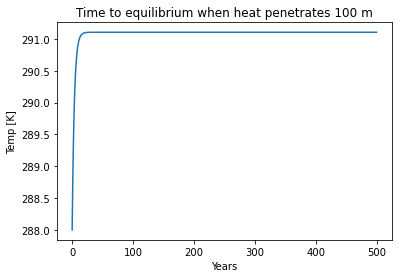

In [23]:
## EXAMPLE/POSSIBLE ANSWER ##

# a). h = 10 vs. h = 100

# call the fn for h=10
temps_h10 = time_to_eq(H=100, alpha=0.32, epsilon=0.57, initial_T=288)
#temps_h10

In [19]:
# compute number of years to reach equilibrium taking first difference...
# np.diff(temps) < 0.0001 # first diff of temp below some acceptable threshold so we say ok, it'll be at equlibrium

# THis is the number of years elapsed until diff(temps) < 0.0001
# effectively 'years til equilibrium?'
yrs_til_eq_h10 = np.argwhere(np.diff(temps_h10)<0.0001)[0].item()
yrs_til_eq_h10

1

The effective heat capacity is 4.0e+08 J/m2/K


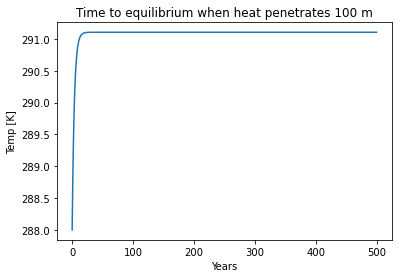

In [20]:
# call the fn for h = 100
temps_h100 = time_to_eq(H=100, alpha=0.32, epsilon=0.57, initial_T=288)
#temps_h100

In [93]:
# compute number of years to reach equilibrium taking first difference...
# np.diff(temps) < 0.0001 # first diff of temp below some acceptable threshold so we say ok, it'll be at equlibrium

# THis is the number of years elapsed until diff(temps) < 0.0001
# effectively 'years til equilibrium?'
yrs_til_eq_h100 = np.argwhere(np.diff(temps_h100)<0.0001)[0].item()
yrs_til_eq_h100

32

In [ ]:
temps_h100# ISSUE with this one: 

In [46]:
# define timestep - 1 year
dt = 60. * 60. * 24. * 365   # one year expressed in seconds

In [51]:
alpha = 0.32
epsilon = 0.57
H = 100

The effective heat capacity is 4.0e+08 J/m2/K


[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Temp [K]'),
 Text(0.5, 1.0, 'Time to equilibrium when heat penetrates 100 m')]

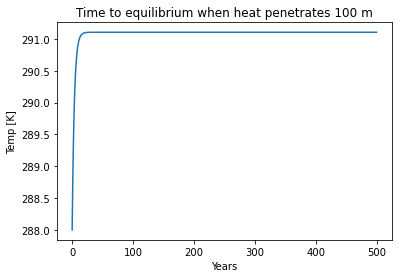

In [52]:
# compute C for this value of H
C = compute_C(H)
print('The effective heat capacity is {:.1e} J/m2/K'.format(C))

numsteps = 500 # here are the number of timesteps (sim for 500 years)
temps = np.zeros(numsteps+1) # Empty vector to track temperatures (+1 is because we want to store the initial temperature)
years = np.zeros(numsteps+1) # Empty vector to track timesteps (years)
temps[0] = 288. # editing the first element of the temp vector to be the initial temperature (288K)

# for each time step "n"
for t in range(numsteps): 

    # add the next value to the time step tracker (where in time is our algorithm?)
    years[t+1] = t+1 
    # use current Temp at time t, heat capacity, timestep, and the "step_forward" function to predict T at t+1
    temps[t+1] = step_forward(temps[t], C)

# plot:
fig, ax = plt.subplots()

# plot temp data (x data = years, y data = temps)
ax.plot(years, temps)

ax.set(xlabel='Years', ylabel='Temp [K]', title='Time to equilibrium when heat penetrates {} m'.format(H))

In [53]:
# compute number of years to reach equilibrium taking first difference...
# np.diff(temps) < 0.0001 # first diff of temp below some acceptable threshold so we say ok, it'll be at equlibrium

# THis is the number of years elapsed until diff(temps) < 0.0001
# effectively 'years til equilibrium?'
yrs_til_eq_h100 = np.argwhere(np.diff(temps)<0.0001)[0].item()
yrs_til_eq_h100

32